<a href="https://colab.research.google.com/github/Kiksecret/AI_BasicNLP/blob/main/Basic_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ขั้นตอนที่ 1: ดาวน์โหลดข้อมูล 

ดาวน์โหลดข้อมูล บันทึกไว้ใน /tmp/sarcasm.json และเก็บไว้ในตัวแปร data ซึ่งเป็น Dataframe ดังโค้ดต่อไปนี้

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
  -O /tmp/sarcasm.json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import requests
from PIL import Image
from io import BytesIO

all_df = pd.read_json("/tmp/sarcasm.json")

--2021-10-18 17:14:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  23.0MB/s    in 0.2s    

2021-10-18 17:14:25 (23.0 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



ต่อไปนี้คือตัวอย่างข้อมูลที่อยู่ใน sarcasm.json สังเกตว่า มี 3 คอลัมน์ ได้แก่ article_link, headline และ is_sarcastic 

คอลัมน์ที่ควรนำมาใช้ในการวิเคราะห์คือ
* headline ซึ่งเป็นข้อความภาษาอังกฤษ 
* is_sarcastic เมื่อเป็น 0 หมายถึง headline นั้นไม่เป็นคำประชดประชัน หากเป็น 1 หมายถึง headline นั้นเป็นคำประชดประชัน

In [ ]:
all_df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


# ขั้นตอนที่ 2: การวิเคราะห์ Sarcasm

## Train Test Split Data :

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [ ]:
# ตรวจสอบหาข้อความที่ซ้ำกัน
all_df.groupby("is_sarcastic").describe()

article_link  ... headline
                    count  ...     freq
is_sarcastic               ...         
0                   14985  ...       10
1                   11724  ...        8

[2 rows x 8 columns]

In [ ]:
all_df['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

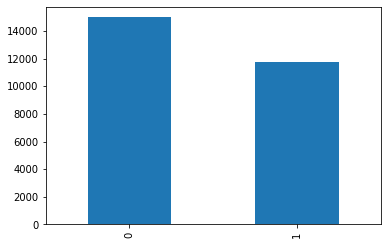

In [ ]:
all_df.is_sarcastic.value_counts().plot.bar()

In [ ]:
# ทำการแยก Data เป็น train_df เพื่อทำการ Train และ ทำ Cross Validation 5Foldและ10Fold
#                   test_df เพื่อทำการ Test Model ในขั้นต้อนสุดท้ายอีกครั้งหนึ่ง

from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(all_df, test_size=0.25, random_state=1987)

In [ ]:
train_df['is_sarcastic'].value_counts()

0    11259
1     8772
Name: is_sarcastic, dtype: int64

In [ ]:
test_df['is_sarcastic'].value_counts()

0    3726
1    2952
Name: is_sarcastic, dtype: int64

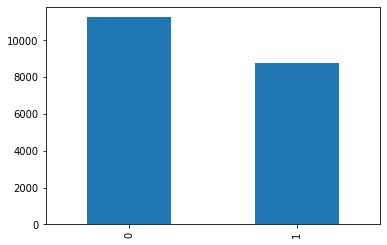

In [ ]:
train_df['is_sarcastic'].value_counts().plot.bar()

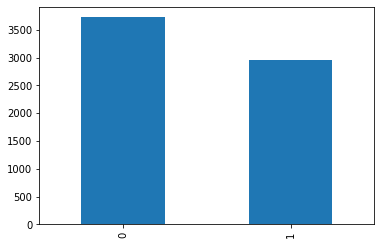

In [ ]:
test_df['is_sarcastic'].value_counts().plot.bar()

## Feature Extraction :

In [ ]:
!pip install pythainlp

     |████████████████████████████████| 11.0 MB 18.8 MB/s 
     |████████████████████████████████| 743 kB 48.5 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.


In [ ]:
# ทำการเรียก Module ตัดคำภาษาไทย
from pythainlp import word_tokenize

In [ ]:
# สร้าง Function ในการตัดคำ และ ทำความสะอาดข้อมูล
def get_th_token(text):
    text = text.lower() 
    text = text.replace('\n',' ')
    token = word_tokenize(text, engine="newmm")
    return token

In [ ]:
# ทดสอบ Function : get_th_token
samp_text='reparations and obama'
get_th_token(samp_text)

['reparations', ' ', 'and', ' ', 'obama']

In [ ]:
# เรียกใช้ CountVectorizer เพื่อแปลงข้อความให้เป็นตัวเลข
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# เแทนที่ Mudule ตัดคำภาษาไทยด้วย Func ที่สร้างไว้ ลงใน Module CountVectorizer และเรียกใช้ N-Gram เพื่อช่วยในการลำดับคำ
vectorizer = CountVectorizer(tokenizer=get_th_token, ngram_range=(1,2))

In [ ]:
data = ["reparations and obama','america's best 20 hikes"]

In [ ]:
vectorizer.fit(data)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function get_th_token at 0x7fed2fe745f0>,
                vocabulary=None)

Corpus

In [ ]:
vectorizer.get_feature_names()

[' ',
 '  20',
 '  and',
 '  best',
 '  hikes',
 '  obama',
 "'",
 "' s",
 "','",
 "',' america",
 '20',
 '20  ',
 'america',
 "america '",
 'and',
 'and  ',
 'best',
 'best  ',
 'hikes',
 'obama',
 "obama ','",
 'reparations',
 'reparations  ',
 's',
 's  ']

In [ ]:
vectorizer.transform(data)

<1x25 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.transform(data).toarray()

array([[5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1]])

In [ ]:
vectorizer.transform(['reparations and obama']).toarray()

array([[2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 0]])

In [ ]:
train_data = train_df['headline']
test_data = test_df['headline']
# เรียก Column Text มาเป็น Feature เพื่อทำการ Train

train_label = train_df['is_sarcastic']
test_label = test_df['is_sarcastic']
# เรียก Column Type มาเป็น Label

In [ ]:
vectorizer = CountVectorizer(tokenizer=get_th_token, ngram_range=(1,2))

In [ ]:
vectorizer.fit(train_data)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function get_th_token at 0x7fed2fe745f0>,
                vocabulary=None)

In [ ]:
train_feature = vectorizer.transform(train_data)
test_feature = vectorizer.transform(test_data)

In [ ]:
train_feature

In [ ]:
train_feature.shape

(20031, 75912)

In [ ]:
train_feature.toarray()

array([[12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       ...,
       [ 2,  0,  0, ...,  0,  0,  0],
       [ 9,  0,  0, ...,  0,  0,  0],
       [13,  0,  0, ...,  0,  0,  0]])

In [ ]:
test_feature

<6678x75912 sparse matrix of type '<class 'numpy.int64'>'
	with 189648 stored elements in Compressed Sparse Row format>

In [ ]:
test_feature.shape

(6678, 75912)

In [ ]:
test_feature.toarray()

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
train_feature_normalize

In [ ]:
train_feature_normalize.shape
# โดยที่ Shape ของ Data ยังคงเท่ากันกับ train_feature ที่ยังไม่ทำการ Normalize

In [ ]:
train_feature_normalize.toarray()

In [ ]:
test_feature_normalize

In [ ]:
test_feature_normalize.shape

In [ ]:
test_feature_normalize.toarray()

# อัลกอริทึมที่ 1 : Logistic Regression
โปรดเพิ่มเติมข้อความและโค้ด

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR = LogisticRegression(random_state=1987,  solver='lbfgs')

In [ ]:
model_LR.fit(train_feature_normalize, train_label)

In [ ]:
c5_LR = cross_val_score(model_LR, train_feature_normalize, train_label, cv=5, scoring='accuracy')
mc5_LR = cross_val_score(model_LR, train_feature_normalize, train_label, cv=5, scoring='accuracy').mean()
print(c5_LR)
print(mc5_LR)

In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

c5_LR_CV_score = cross_validate(model_LR, train_feature_normalize, train_label, cv=5, scoring=(scoring))
c5_LR_CV_score

In [ ]:
c5_LR_CV_score_table = pd.DataFrame(c5_LR_CV_score)
c5_LR_CV_score_table

In [ ]:
c5_LR_CV_score_board = c5_LR_CV_score_table[['test_accuracy', 
                                               'test_precision', 
                                               'test_recall', 
                                               'test_f1_score']].mean()
c5_LR_CV_score_board

In [ ]:
visualizer_c5_LR = CVScores(model_LR, cv=5, scoring='accuracy')

visualizer_c5_LR.fit(train_feature_normalize, train_label)
visualizer_c5_LR.show() 

In [ ]:
c10_LR = cross_val_score(model_LR, train_feature_normalize, train_label, cv=10, scoring='accuracy')
mc10_LR = cross_val_score(model_LR, train_feature_normalize, train_label, cv=10, scoring='accuracy').mean()
print(c10_LR)
print(mc10_LR)

In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

c10_LR_CV_score = cross_validate(model_LR, train_feature_normalize, train_label, cv=10, scoring=(scoring))
c10_LR_CV_score

In [ ]:
c10_LR_CV_score_table = pd.DataFrame(c10_LR_CV_score)
c10_LR_CV_score_table

In [ ]:
c10_LR_CV_score_board = c10_LR_CV_score_table[['test_accuracy', 
                                               'test_precision', 
                                               'test_recall', 
                                               'test_f1_score']].mean()
c10_LR_CV_score_board

In [ ]:
visualizer_c10_LR = CVScores(model_LR, cv=10, scoring='accuracy')

visualizer_c10_LR.fit(train_feature_normalize, train_label)
visualizer_c10_LR.show() 

In [ ]:
predict_LR = model_LR.predict(test_feature_normalize)

In [ ]:
acc_LR = classification_report(test_label, predict_LR, digits=4)
print(acc_LR)

In [ ]:
con_mat_LR = confusion_matrix(test_label, predict_LR)
print(con_mat_LR)

In [ ]:
lr_cm = ConfusionMatrix(model_LR)

lr_cm.fit(train_feature_normalize, train_label)
lr_cm.score(test_feature_normalize, test_label)

lr_cm.show()

# อัลกอริทึมที่ 2 : Random Forest
โปรดเพิ่มเติมข้อความและโค้ด

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_RDF = RandomForestClassifier(n_estimators=100, random_state=1987)

In [ ]:
model_RDF.fit(train_feature_normalize, train_label)

In [ ]:
c5_RDF = cross_val_score(model_RDF, train_feature_normalize, train_label, cv=5, scoring='accuracy')
mc5_RDF = cross_val_score(model_RDF, train_feature_normalize, train_label, cv=5, scoring='accuracy').mean()
print(c5_RDF)
print(mc5_RDF)

In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

c5_RDF_CV_score = cross_validate(model_RDF, train_feature_normalize, train_label, cv=5, scoring=(scoring))
c5_RDF_CV_score

In [ ]:
c5_RDF_CV_score_table = pd.DataFrame(c5_RDF_CV_score)
c5_RDF_CV_score_table

In [ ]:
c5_RDF_CV_score_board = c5_RDF_CV_score_table[['test_accuracy', 
                                               'test_precision', 
                                               'test_recall', 
                                               'test_f1_score']].mean()
c5_RDF_CV_score_board

In [ ]:
visualizer_c5_RDF = CVScores(model_RDF, cv=5, scoring='accuracy')

visualizer_c5_RDF.fit(train_feature_normalize, train_label)
visualizer_c5_RDF.show() 

In [ ]:
c10_RDF = cross_val_score(model_RDF, train_feature_normalize, train_label, cv=10, scoring='accuracy')
mc10_RDF = cross_val_score(model_RDF, train_feature_normalize, train_label, cv=10, scoring='accuracy').mean()

print(c10_RDF)
print(mc10_RDF)

In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

c10_RDF_CV_score = cross_validate(model_RDF, train_feature_normalize, train_label, cv=10, scoring=(scoring))
c10_RDF_CV_score

In [ ]:
c10_RDF_CV_score_table = pd.DataFrame(c10_RDF_CV_score)
c10_RDF_CV_score_table

In [ ]:
c10_RDF_CV_score_board = c10_RDF_CV_score_table[['test_accuracy', 
                                               'test_precision', 
                                               'test_recall', 
                                               'test_f1_score']].mean()
c10_RDF_CV_score_board

In [ ]:
visualizer_c10_RDF = CVScores(model_RDF, cv=10, scoring='accuracy')

visualizer_c10_RDF.fit(train_feature_normalize, train_label)
visualizer_c10_RDF.show()

In [ ]:
predict_RDF = model_RDF.predict(test_feature_normalize)

In [ ]:
acc_RDF = classification_report(test_label, predict_RDF, digits=4)
print(acc_RDF)

In [ ]:
con_mat_RDF = confusion_matrix(test_label, predict_RDF)
print(con_mat_RDF)

In [ ]:
rd_cm = ConfusionMatrix(model_RDF)

rd_cm.fit(train_feature_normalize, train_label)
rd_cm.score(test_feature_normalize, test_label)

rd_cm.show()